In [53]:
def librerias():
    """Importación de las librerías necesarias"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [54]:
"""Importación del dataset, la función pandas read_csv()se usa 
    para leer un archivo CSV en un marco de datos. 
    """
data_df= pd.read_csv('winequality.csv')
print("Dataset importado: ", data_df.head(5))

Dataset importado:     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


In [55]:
 """Función para separar los datos del dataset, además se escogen las características para realizar la predicción"""
    
caracteristicas = ['fixed acidity','volatile acidity','citric acid','residual sugar',
                       'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
x = data_df[caracteristicas]
"""separar la columna con los valores a predecir"""
y = data_df['quality']
print ("Dataset separando:\n\n", x, y, sep ='\n\n')


Dataset separando:



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

     

In [56]:
 """Usaremos la función train_test_split() para dividir nuestros datos en dos conjuntos.
    Al especificar train_size como 0.3,nuestro objetivo es colocar el 30 % de los 
    datos en nuestro conjunto de entrenamiento y el resto de los datos en el conjunto de prueba."""
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

In [57]:
"""Entranamiento del modelo"""
clf = svm.SVC(kernel='linear')
clf.fit(x, y)
y_pred = clf.predict(X_test)

In [62]:
"""Las principales métricas utilizadas para evaluar el rendimiento del modelo"""
print("MÉTRICAS DE RENDIMIENTO \n")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

MÉTRICAS DE RENDIMIENTO 

Accuracy: 0.5854166666666667
Precision: 0.1943927994300707
Recall: 0.23634374138406397


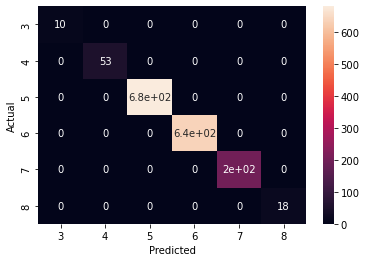

In [63]:
"""Matriz de confusión, Para crear la Matriz de confusión
usando pandas, deberá aplicar la tabla de referencias  pd.crosstab  de la siguiente manera:"""
data_df = {'y_Actual': y,'y_Predicted': y}
df = pd.DataFrame(data_df, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()